In [21]:
import os
import glob
import pandas as pd
os.chdir("../data")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "../combined/combined_csv.csv", index=False, encoding='utf-8-sig')

In [28]:
import numpy as np
import pandas as pd

df = pd.read_csv("../combined/combined_csv.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121863 entries, 0 to 121862
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   video_id                121863 non-null  object 
 1   trending_date           120746 non-null  object 
 2   title                   120746 non-null  object 
 3   channel_title           120746 non-null  object 
 4   category_id             120746 non-null  float64
 5   publish_time            120746 non-null  object 
 6   tags                    120746 non-null  object 
 7   views                   120746 non-null  float64
 8   likes                   120746 non-null  float64
 9   dislikes                120746 non-null  float64
 10  comment_count           120746 non-null  float64
 11  thumbnail_link          120746 non-null  object 
 12  comments_disabled       120746 non-null  object 
 13  ratings_disabled        120746 non-null  object 
 14  video_error_or_remov

In [29]:
with open("../data/US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

In [30]:
df.drop(df.columns[[0,1,5,7,8,9,10,11,12,13,14]], axis = 1, inplace = True)
rows_with_nan = [index for index, row in df.iterrows() if row.isnull().any()]
df.drop(rows_with_nan, inplace = True)
df.drop_duplicates(subset=["title","channel_title","tags","description"], inplace=True)

In [31]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31748 entries, 0 to 121862
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          31748 non-null  object 
 1   channel_title  31748 non-null  object 
 2   category_id    31748 non-null  float64
 3   tags           31748 non-null  object 
 4   description    31748 non-null  object 
 5   category_name  31748 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.7+ MB


Index(['title', 'channel_title', 'category_id', 'tags', 'description',
       'category_name'],
      dtype='object')

In [32]:
df.drop(df.columns[[0,1,2,3,4]], axis = 1, inplace = True)
df.head()

,category_name
0,Music
1,Comedy
2,Comedy
3,Entertainment
4,Music


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31748 entries, 0 to 121862
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_name  31748 non-null  object
dtypes: object(1)
memory usage: 496.1+ KB


In [49]:
import matplotlib.pyplot as plt
print(df.value_counts())
counts = df.value_counts().to_dict()
print(counts)

category_name        
Entertainment            10092
News & Politics           3300
Music                     3211
People & Blogs            2947
Comedy                    2480
Sports                    2399
Howto & Style             1909
Film & Animation          1503
Gaming                    1020
Science & Technology       971
Education                  815
Pets & Animals             354
Autos & Vehicles           315
Travel & Events            253
Shows                      112
Nonprofits & Activism       65
Movies                       2
dtype: int64
{('Entertainment',): 10092, ('News & Politics',): 3300, ('Music',): 3211, ('People & Blogs',): 2947, ('Comedy',): 2480, ('Sports',): 2399, ('Howto & Style',): 1909, ('Film & Animation',): 1503, ('Gaming',): 1020, ('Science & Technology',): 971, ('Education',): 815, ('Pets & Animals',): 354, ('Autos & Vehicles',): 315, ('Travel & Events',): 253, ('Shows',): 112, ('Nonprofits & Activism',): 65, ('Movies',): 2}


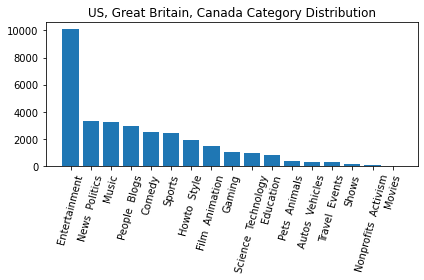

In [64]:
import re
keys = list(counts.keys())
values = list(counts.values())


for i in range(len(keys)):
    keys[i] = ''.join(keys[i])
    keys[i] = re.sub(r'[^\w\s]', '', keys[i])
    
plt.bar(keys, values)
plt.xticks(rotation = 75)
plt.title("US, Great Britain, Canada Category Distribution")
plt.tight_layout()
plt.savefig("../data/category.jpg")